In [55]:
import os
import urllib
import tarfile

DOWNLOAD_ROOT='https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH=os.path.join(os.getcwd(), 'datasets', 'housing')
HOUSING_URL=DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [106]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [116]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    total_rooms_ix, total_bedrooms_ix, population_ix, households_ix = 3,4,5,6

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:,self.total_rooms_ix]/X[:,self.households_ix]
        bedrooms_per_room = X[:,self.total_bedrooms_ix]/X[:,self.total_rooms_ix]
        population_per_household = X[:,self.population_ix]/X[:,self.households_ix]
        return np.c_[X, rooms_per_household, bedrooms_per_room, population_per_household]

    def transform_df(self, X_p, y=None):
        X = self.transform(X_p.values, y)
        X_p['rooms_per_household'] = X[:,len(X[0])-1]
        X_p['bedrooms_per_room'] = X[:,len(X[0])-2]
        X_p['population_per_household'] = X[:,len(X[0])-3]
        return X_p

combined_attributes_adder = CombinedAttributesAdder()
housing = combined_attributes_adder.transform_df(housing)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.55556,0.146591,6.98413
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.10984,0.155797,6.23814
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.80226,0.129516,8.28814
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.54795,0.184458,5.81735
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.18147,0.172096,6.28185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.56061,0.224625,5.04545
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,3.12281,0.215208,6.11404
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.32564,0.215173,5.20554
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.12321,0.219892,5.32951


In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20433 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
ocean_proximity             20640 non-null object
rooms_per_household         20640 non-null float64
bedrooms_per_room           20433 non-null float64
population_per_household    20640 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e2f6d8f98>,
      dtype=object)

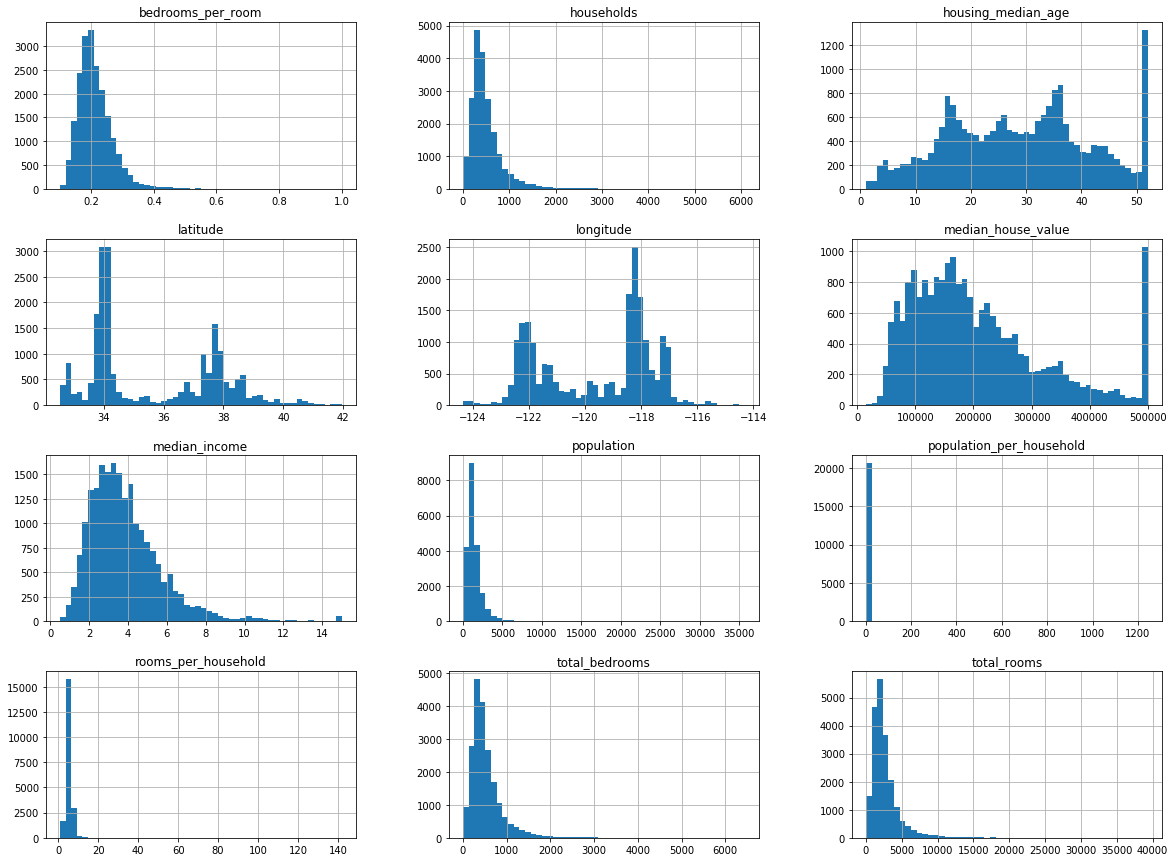

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))

In [9]:
# DROP CORRESPONDING DISTRICTS
# housing.dropna(subset['total_bedrooms'])
# housing.dropna(subset['bedrooms_per_room'])

# DROP ATTRIBUTE
# housing.drop('total_bedrooms', axis=1)
# housing.drop('bedrooms_per_room', axis=1)

# MEDIAN
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)
housing['bedrooms_per_room'].fillna(housing['bedrooms_per_room'].median(), inplace=True)

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='median')
# housing = housing.drop('ocean_proximity', axis=1)
# imputer.fit(housing)
# imputer.transform(housing)



In [54]:
# ORDINAL ENCODING
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# ordinal_encoder.fit_transform(housing[['ocean_proximity']])

# ONE HOT ENCODING
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit_transform(housing[['ocean_proximity']])
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [11]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)

In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda _id: test_set_check(_id, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=1)

In [14]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
15961,-122.43,37.71,52.0,1410.0,286.0,879.0,282.0,3.1908,255600.0,NEAR BAY,5.000000,0.202837,3.117021
1771,-122.35,37.95,42.0,1485.0,290.0,971.0,303.0,3.6094,114600.0,NEAR BAY,4.900990,0.195286,3.204620
16414,-121.24,37.90,16.0,50.0,10.0,20.0,6.0,2.6250,137500.0,INLAND,8.333333,0.200000,3.333333
5056,-118.35,34.02,34.0,5218.0,1576.0,3538.0,1371.0,1.5143,118800.0,<1H OCEAN,3.805981,0.302031,2.580598
8589,-118.39,33.89,38.0,1851.0,332.0,750.0,314.0,7.3356,422700.0,<1H OCEAN,5.894904,0.179363,2.388535


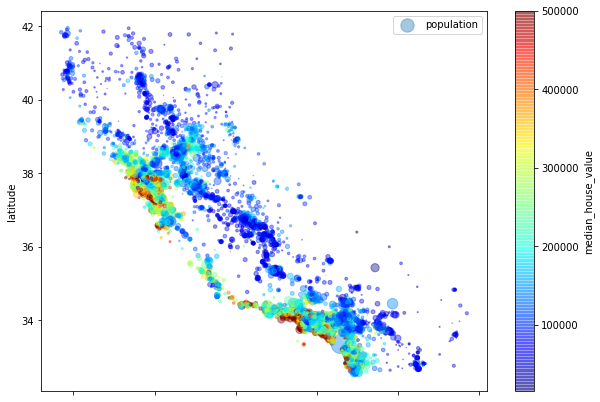

In [15]:
train_set.plot(kind='scatter', x='longitude', y='latitude', alpha=.4, s=train_set['population']/100,
              label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

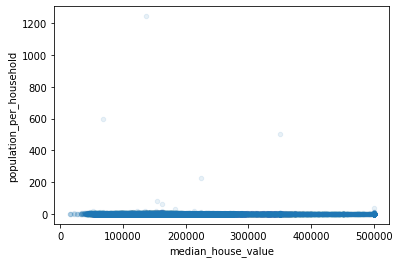

In [16]:
train_set.plot(kind='scatter', x='median_house_value', y='population_per_household', alpha=0.1)

In [17]:
train_set.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.925246,-0.106156,0.037578,0.064945,0.095861,0.049854,-0.018227,-0.050893,-0.026794,0.096186,0.000354
latitude,-0.925246,1.000000,0.009373,-0.029916,-0.062637,-0.105325,-0.066939,-0.076734,-0.139374,0.107190,-0.116821,0.005150
housing_median_age,-0.106156,0.009373,1.000000,-0.361784,-0.318355,-0.296996,-0.301496,-0.123550,0.105758,-0.148503,0.136368,0.014685
total_rooms,0.037578,-0.029916,-0.361784,1.000000,0.925735,0.854458,0.916737,0.201318,0.135514,0.127737,-0.186857,-0.025162
total_bedrooms,0.064945,-0.062637,-0.318355,0.925735,1.000000,0.870972,0.973346,-0.006727,0.050251,0.000713,0.087093,-0.028819
population,0.095861,-0.105325,-0.296996,0.854458,0.870972,1.000000,0.905040,0.007521,-0.023884,-0.075108,0.035537,0.075533
households,0.049854,-0.066939,-0.301496,0.916737,0.973346,0.905040,1.000000,0.013801,0.066801,-0.084235,0.066993,-0.027974
median_income,-0.018227,-0.076734,-0.123550,0.201318,-0.006727,0.007521,0.013801,1.000000,0.688194,0.311813,-0.611829,0.022609
median_house_value,-0.050893,-0.139374,0.105758,0.135514,0.050251,-0.023884,0.066801,0.688194,1.000000,0.146508,-0.252075,-0.021979
rooms_per_household,-0.026794,0.107190,-0.148503,0.127737,0.000713,-0.075108,-0.084235,0.311813,0.146508,1.000000,-0.395174,-0.004048


In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
ocean_proximity             20640 non-null object
rooms_per_household         20640 non-null float64
bedrooms_per_room           20640 non-null float64
population_per_household    20640 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [19]:
housing['ocean_proximity'].head()

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object